In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/baseball_hw.csv', index_col=0)
df.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


In [3]:
df.describe()

,height,weight
count,1015.000000,1015.000000
mean,1.871717,91.330191
std,0.058774,9.445198
min,1.701800,68.038800
25%,1.828800,84.368112
50%,1.879600,90.718400
75%,1.905000,97.522280
max,2.108200,131.541680


In [4]:
import seaborn as sns

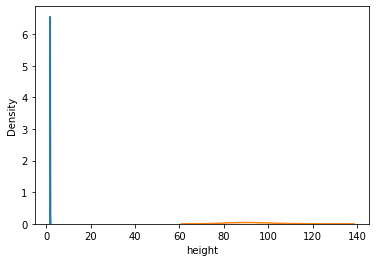

In [5]:
# height và weight có thang đo và phân phối khác nhau
sns.kdeplot(df.height)
sns.kdeplot(df.weight)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


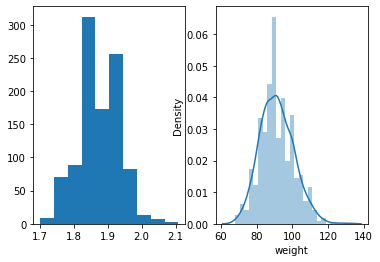

In [7]:
plt.subplot(1, 2, 1)
plt.hist(df.height)
plt.subplot(1, 2, 2)
sns.distplot(df.weight)
plt.show()

In [8]:
df.height.skew()

0.23353939068968324

In [10]:
df.weight.skew()

0.34318597598127093

### Phân phối lệch phải

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

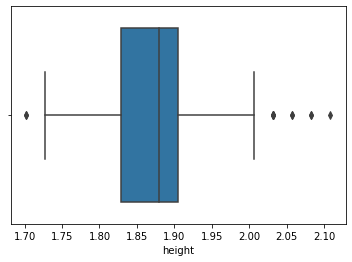

In [11]:
sns.boxplot(df.height)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

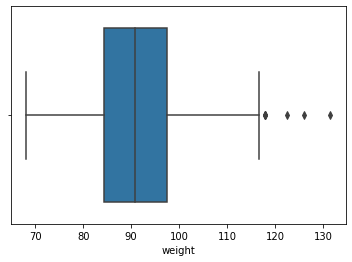

In [12]:
sns.boxplot(df.weight)

In [17]:
# Loai bỏ outlier
from scipy.stats import zscore
from scipy import stats

In [18]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.head()

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


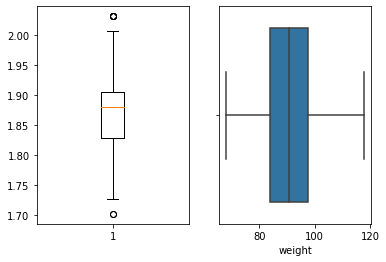

In [25]:
plt.subplot(1, 2, 1)
plt.boxplot(new_df.height)
plt.subplot(1, 2, 2)
sns.boxplot(new_df.weight)
plt.show()

In [26]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max = MinMaxScaler()
X_minmax = min_max.fit_transform(new_df)
df_scaler = pd.DataFrame(X_minmax, columns=['height', 'weight'])

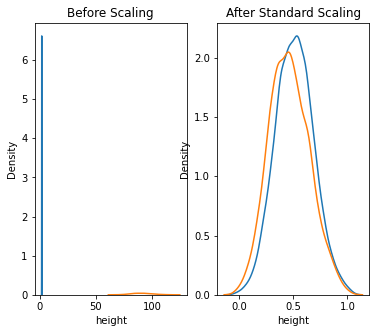

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(new_df.height, ax=ax1)
sns.kdeplot(new_df.weight, ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df_scaler.height, ax=ax2)
sns.kdeplot(df_scaler.weight, ax=ax2)

plt.show()